# Sprint 14 Tasca 1. Tasca base de dades NoSQL

## Nivell 1

## Exercici 1. Crea una base de dades NoSQL utilitzant MongoDB. Afegeix-li algunes dades d'exemple que et permetin comprovar que ets capaç de processar-ne la informació de manera bàsica.

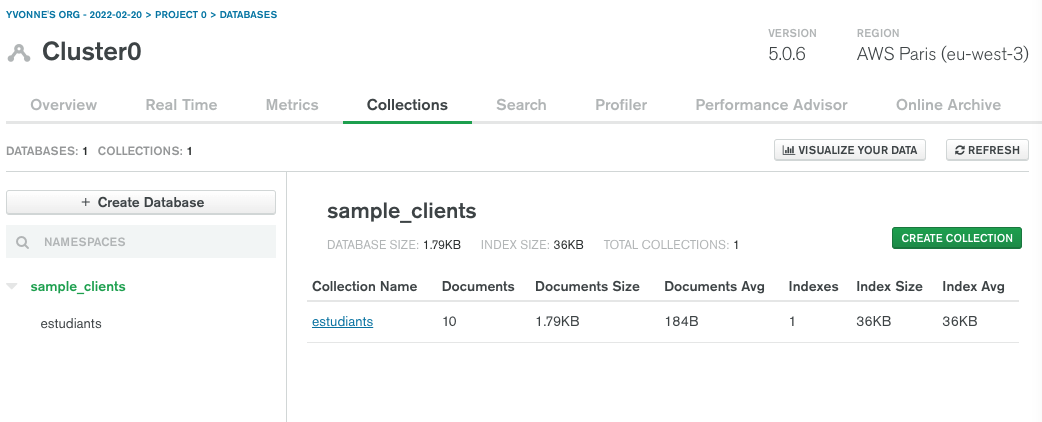

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Captura de pantalla amb base de dades NoSQL a MongoDB amb una col·lecció de 10 documents
from IPython.display import Image
from IPython.core.display import HTML 
Image("mongodb.png")


## Exercici 2. Connecta la base de dades NoSQL a Python utilitzant per exemple pymongo.

In [2]:
import pymongo
import dns
from pymongo import MongoClient
from configparser import ConfigParser

In [3]:
# Read config.ini file with your used and password

config_object = ConfigParser()
config_object.read("config3.ini")


userinfo = config_object["USERINFO"]

In [4]:
# Connect to the cluster
client = pymongo.MongoClient("mongodb+srv://%s:%s@cluster0.ikmln.mongodb.net/test" % (userinfo["user"], userinfo["password"]))


In [5]:
# Access the "sample_clients" db
mydb = client["sample_clients"]

In [6]:
# Check the database object
mydb

Database(MongoClient(host=['cluster0-shard-00-01.ikmln.mongodb.net:27017', 'cluster0-shard-00-00.ikmln.mongodb.net:27017', 'cluster0-shard-00-02.ikmln.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-j0d9j9-shard-0', ssl=True), 'sample_clients')

In [7]:
# Access the collection
mycol = mydb["estudiants"]

In [8]:
# Display all documents on the collection
for x in mycol.find():
    print(x)

{'_id': 1, 'name': 'Aurelia Menendez', 'scores': [{'score': 60.06045071030959, 'type': 'exam'}, {'score': 52.79790691903873, 'type': 'quiz'}, {'score': 71.76133439165544, 'type': 'homework'}], 'country': 'Spain'}
{'_id': 2, 'name': 'Corliss Zuk', 'scores': [{'score': 67.03077096065002, 'type': 'exam'}, {'score': 6.301851677835235, 'type': 'quiz'}, {'score': 66.28344683278382, 'type': 'homework'}], 'country': 'Austria'}
{'_id': 3, 'name': 'Bao Ziglar', 'scores': [{'score': 71.64343899778332, 'type': 'exam'}, {'score': 24.80221293650313, 'type': 'quiz'}, {'score': 42.26147058804812, 'type': 'homework'}, {'score': 52.57635676778332, 'type': 'exam'}]}
{'_id': 4, 'name': 'Zachary Langlais', 'scores': [{'score': 78.68385091304332, 'type': 'exam'}, {'score': 90.2963101368042, 'type': 'quiz'}, {'score': 34.41620148042529, 'type': 'homework'}]}
{'_id': 5, 'name': 'Wilburn Spiess', 'phone': '0013154862', 'country': 'Germany', 'scores': [{'score': 44.87186330181261, 'type': 'exam'}, {'score': 25.

## Nivell 2

## Exercici 1. Carrega algunes consultes senzilles a un Pandas Dataframe. 

#### Seleccionem totes les dades de l'estudiant amb id 10

In [9]:
for elem in mycol.find({'_id':10}):
    df_elem=pd.DataFrame(elem)


In [10]:
df_elem

,_id,name,scores
0,10,Denisha Cast,"{'score': 45.61876862259409, 'type': 'exam'}"
1,10,Denisha Cast,"{'score': 78.35723209418343, 'type': 'quiz'}"
2,10,Denisha Cast,"{'score': 55.90835657173456, 'type': 'homework'}"


#### Seleccionem totes les dades de l'estudiant de Corea del Sud

In [11]:
for elem2 in mycol.find({'country': 'South Korea'}):
    df_elem_2=pd.DataFrame(elem2)

In [12]:
df_elem_2

,_id,name,country,siblings
0,9,Park Hyung Sik,South Korea,{'name': 'Park Ye Jin'}
1,9,Park Hyung Sik,South Korea,{'name': 'Park Byung Chul'}


#### Seleccionem els noms dels estudiants

In [13]:
list_3 = []
for elem3 in mycol.find({}, {'scores':0,'siblings':0,'phone':0,'country':0}):
    list_3.append(elem3)
    
df_elem_3=pd.DataFrame(list_3)

In [14]:
df_elem_3

,_id,name
0,1,Aurelia Menendez
1,2,Corliss Zuk
2,3,Bao Ziglar
3,4,Zachary Langlais
4,5,Wilburn Spiess
5,6,Jenette Flanders
6,7,Salena Olmos
7,8,Daphne Zheng
8,9,Park Hyung Sik
9,10,Denisha Cast


#### Seleccionem totes les dades

In [62]:
list_4 = []
for elem4 in mycol.find({}):
    list_4.append(elem4)

df_elem_4=pd.DataFrame(list_4)

In [63]:
df_elem_4

,_id,name,scores,country,phone,siblings
0,1,Aurelia Menendez,"[{'score': 60.06045071030959, 'type': 'exam'},...",Spain,NaN,NaN
1,2,Corliss Zuk,"[{'score': 67.03077096065002, 'type': 'exam'},...",Austria,NaN,NaN
2,3,Bao Ziglar,"[{'score': 71.64343899778332, 'type': 'exam'},...",NaN,NaN,NaN
3,4,Zachary Langlais,"[{'score': 78.68385091304332, 'type': 'exam'},...",NaN,NaN,NaN
4,5,Wilburn Spiess,"[{'score': 44.87186330181261, 'type': 'exam'},...",Germany,0013154862,NaN
5,6,Jenette Flanders,"[{'score': 37.32285459166097, 'type': 'exam'},...",UK,NaN,NaN
6,7,Salena Olmos,"[{'score': 86.0319702155683, 'type': 'exam'}, ...",NaN,NaN,"[{'name': 'Charles Olmos'}, {'name': 'Mike Olm..."
7,8,Daphne Zheng,NaN,USA,0014567890,NaN
8,9,Park Hyung Sik,NaN,South Korea,NaN,"[{'name': 'Park Ye Jin'}, {'name': 'Park Byung..."
9,10,Denisha Cast,"[{'score': 45.61876862259409, 'type': 'exam'},...",NaN,NaN,NaN


## Nivell 3

## Exercici 1. Genera un resum estadístic de la informació que conté la base de dades.



- Nombre d'alumnes: 10
- Nacionalitats: 6 (R.U., EE.UU., Austria, Espanya, Alemanya i Corea del Sud)
- Telèfons: 2
- Estudiants amb germans: 2
- Estudiants amb notes: 8


In [76]:
# Informació estadística de la taula
df_elem_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       10 non-null     int64 
 1   name      10 non-null     object
 2   scores    8 non-null      object
 3   country   6 non-null      object
 4   phone     2 non-null      object
 5   siblings  2 non-null      object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [28]:
# La base de dades conté 10 alumnes
df_elem_4.name.nunique()

10

In [30]:
# De 6 alumnes en coneixem el país d'origen
df_elem_4.country.nunique()

6

In [35]:
# No hi ha nacionalitats repetides d'entre els alumnes que en coneixem la nacionalitat
df_elem_4.country.value_counts()

UK             1
USA            1
Austria        1
Spain          1
South Korea    1
Germany        1
Name: country, dtype: int64

In [45]:
# Coneixem el telèfon de dos alumnes
df_elem_4.phone.value_counts()

0013154862    1
0014567890    1
Name: phone, dtype: int64